<a href="https://colab.research.google.com/github/pknemi/MNIST_Digit_classification/blob/main/Digit_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Build Convolutional Neural Network (CNN) model to classify
handwritten digits from the famous MNIST dataset.The goal is to train a model that can accurately
predict digits (0-9) based on input images.


#Importing the Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Loading MNIST dataset

In [4]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [20]:
x_train.shape


(60000, 28, 28, 1)

In [21]:
x_test.shape

(10000, 28, 28, 1)

In [22]:
y_train.shape

(60000,)

In [23]:
y_test.shape

(10000,)

#Data preprocessing
Normalize pixel values to the range [0,1] for better model performance and


Reshape the input data to fit into a CNN model.

In [5]:
#n Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
#reshaping
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Displaying a sample image

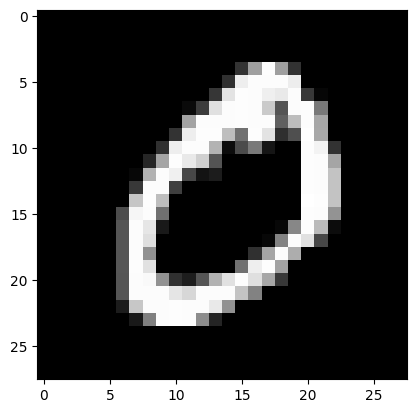

In [7]:
plt.imshow(x_train[1].reshape(28,28), cmap='gray')
plt.show()

#Building CNN model

In [10]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Summary of the model

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332,192 (1.27 MB)

 Trainable params: 110,666 (432.29 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 221,334 (864.59 KB)

#Compiling the model

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Training the model

In [13]:
history=model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9367 - loss: 0.2139 - val_accuracy: 0.9794 - val_loss: 0.0665
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.9667 - loss: 0.1118 - val_accuracy: 0.9832 - val_loss: 0.0584
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 42ms/step - accuracy: 0.9733 - loss: 0.0910 - val_accuracy: 0.9852 - val_loss: 0.0494
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9778 - loss: 0.0751 - val_accuracy: 0.9878 - val_loss: 0.0439
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.9810 - loss: 0.0634 - val_accuracy: 0.9842 - val_loss: 0.0520
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.9831 - loss: 0.0568 - val_accuracy: 0.9857 - val_loss: 0.0497
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.9830 - loss: 0.0562 - val_accuracy: 0.9881 - val_loss: 0.0460
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9857 

#Evaluate the model

In [15]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9863 - loss: 0.0519


[0.04199027270078659, 0.9886999726295471]

In [37]:
# Predict a sample digit
import numpy as np
prediction = model.predict(x_test[:1])
print("Predicted Digit:", np.argmax(prediction))
actual_digits=y_test[:1]
print("Actual Digit:",actual_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Digit: 7
Actual Digit: [7]


Loss plot showing model performance

In [19]:
#history.history

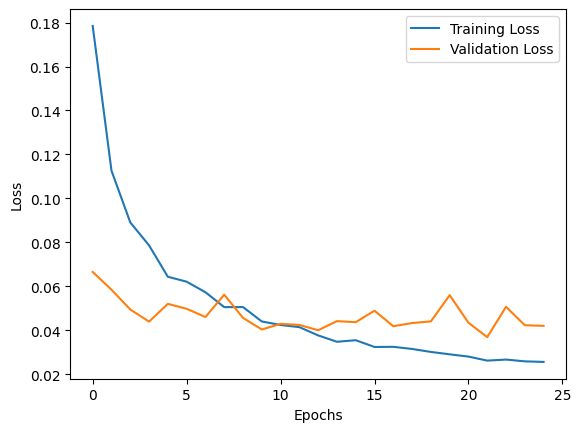

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy plot showing model performance

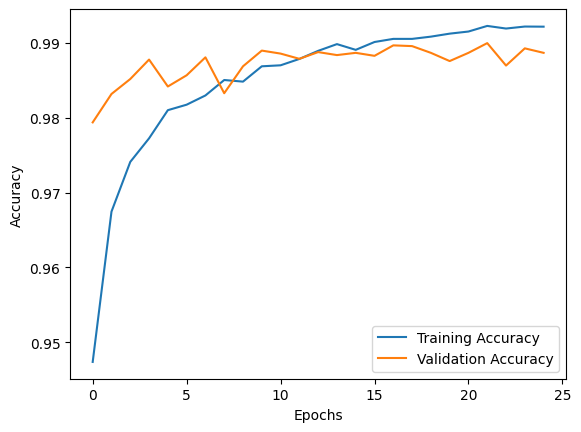

In [17]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Saving the model

In [42]:
model.save("cnn_digit_classifier.h5")


**SUMMARY OF THE PROJECT**



MNIST Dataset: 60,000 training images, 10,000 test images (28×28 grayscale digits).

**Model Training & Evaluation**:

Used Convolutional Neural Networks (CNN) for classification.

Applied Dropout & Batch Normalization to improve performance.

Loss Function: SparseCategoricalCrossentropy -for multi-class classification.

Optimizer: Adam-for efficient learning.

**Results & Performance**

Training Accuracy: 99%

Validation Accuracy: 98%

Loss decreases,accuracy increases across epochs.
CNN effectively recognize handwritten digits.